# Support Vector Machine Model

In [21]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
import sklearn.model_selection as sk
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [22]:
df =pd.read_csv(r'D:\Drug-Persistency-ML-Model-main\Data_cleaned_dataset.csv')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P3,0,0,3,0,0,1,2,0,1,...,N,Y,N,N,N,N,N,N,N,2
1,P4,0,0,2,1,0,3,2,0,1,...,N,N,N,N,N,N,N,N,N,1
2,P8,0,0,2,1,0,3,2,0,1,...,N,N,N,N,N,N,N,N,N,1
3,P12,0,0,2,1,0,3,2,0,1,...,N,N,N,N,N,N,N,N,N,0
4,P13,0,0,2,1,0,3,2,0,1,...,N,N,Y,N,N,N,N,N,N,1


In [23]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Ptid', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx',
       'Change_T_Score', 'Change_Risk_Segment',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       

In [24]:
df=df.drop(['Ptid'],axis=1)
cat_cols = cat_cols.drop(labels='Ptid')

In [25]:
df =pd.get_dummies(df, columns=cat_cols)
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Excessive_Thinness_N,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_N,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_N,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_N,Risk_Immobilization_Y,Risk_Recurring_Falls_N,Risk_Recurring_Falls_Y
0,0,0,3,0,0,1,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,2,1,0,3,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,2,1,0,3,2,0,1,1,...,1,0,1,0,1,0,1,0,1,0
3,0,0,2,1,0,3,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,0,0,2,1,0,3,2,0,1,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1,0,2,1,3,3,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1077,0,0,2,1,4,0,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1078,0,0,2,1,0,1,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1079,1,0,2,1,3,3,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [26]:
X=df.drop(['Persistency_Flag'], axis=1)
y=df['Persistency_Flag']
X

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Excessive_Thinness_N,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_N,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_N,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_N,Risk_Immobilization_Y,Risk_Recurring_Falls_N,Risk_Recurring_Falls_Y
0,0,3,0,0,1,2,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,2,1,0,3,2,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,0,2,1,0,3,2,0,1,1,1,...,1,0,1,0,1,0,1,0,1,0
3,0,2,1,0,3,2,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,2,1,0,3,2,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0,2,1,3,3,2,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1077,0,2,1,4,0,2,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1078,0,2,1,0,1,1,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1079,0,2,1,3,3,2,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [27]:
print('Features:', X.shape)
print('target:',y.shape)

Features: (1081, 116)
target: (1081,)


In [28]:
X= df.to_numpy()

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [30]:
X_train.shape, y_train.shape

((756, 117), (756,))

In [31]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [33]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 1.0


In [34]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 1.0


In [35]:
import tensorflow as tf
confusion_matrix(y_test, tf.round(y_pred))

array([[178,   0],
       [  0, 147]], dtype=int64)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels, 
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
  

# AdaBoost Classification

In [19]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [36]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [37]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# KNN Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [41]:
y_pred=knn_model.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.7846153846153846

In [45]:
models=[knn_model, model,clf]  

In [66]:

for model in models:
    names=model.__class__.__name__
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, accuracy*100]], columns=["models", "accuracy"])
    reults=results.append(result)
    

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = clf.predict(X_test)
y_score2 = model.predict(X_test)
y_score3 = knn.predict(X_test)

In [73]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

In [74]:
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for AdaBoost: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score3))

roc_auc_score for SVM:  1.0
roc_auc_score for AdaBoost:  0.7755293128487349
roc_auc_score for KNN:  0.7755293128487349


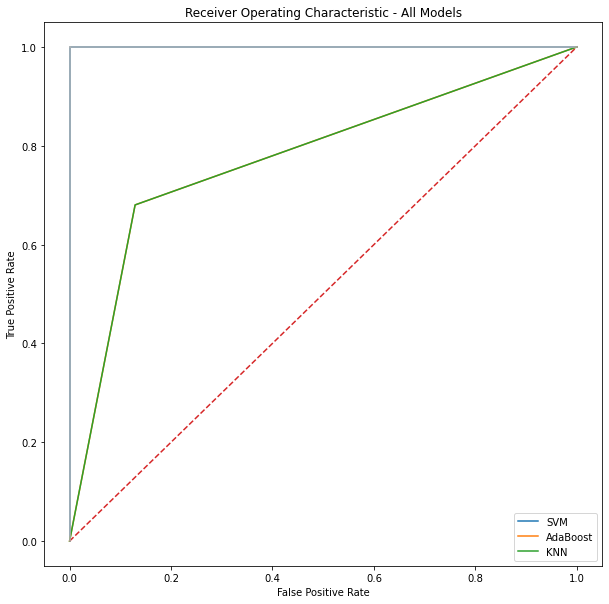

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - All Models')
plt.plot(false_positive_rate1, true_positive_rate1, label = "SVM")
plt.plot(false_positive_rate2, true_positive_rate2, label = "AdaBoost")
plt.plot(false_positive_rate3, true_positive_rate3, label = "KNN")

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()